In [93]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (3).csv


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import io
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [95]:
data = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']))

In [96]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [97]:
prediction_days = 60
x_train, y_train = [], []

In [98]:
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [100]:
uploaded2 = files.upload()

Saving test_data.csv to test_data.csv


In [101]:
test_data = pd.read_csv(io.BytesIO(uploaded2['test_data.csv']))

Epoch 1/25
66/66 [==============================] - 12s 97ms/step - loss: 0.0083
Epoch 2/25
66/66 [==============================] - 7s 101ms/step - loss: 0.0014
Epoch 3/25
66/66 [==============================] - 7s 99ms/step - loss: 0.0015
Epoch 4/25
66/66 [==============================] - 7s 100ms/step - loss: 0.0014
Epoch 5/25
66/66 [==============================] - 7s 102ms/step - loss: 0.0012
Epoch 6/25
66/66 [==============================] - 8s 117ms/step - loss: 9.7577e-04
Epoch 7/25
66/66 [==============================] - 7s 99ms/step - loss: 0.0011
Epoch 8/25
66/66 [==============================] - 6s 98ms/step - loss: 9.5609e-04
Epoch 9/25
66/66 [==============================] - 6s 98ms/step - loss: 9.3669e-04
Epoch 10/25
66/66 [==============================] - 8s 114ms/step - loss: 9.5964e-04
Epoch 11/25
66/66 [==============================] - 7s 100ms/step - loss: 9.9897e-04
Epoch 12/25
66/66 [==============================] - 7s 111ms/step - loss: 9.0294e-04
Epoch

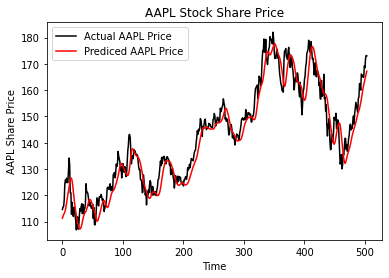

In [103]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

company = "AAPL"
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="red", label=f"Prediced {company} Price")
plt.title(f"{company} Stock Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()